# Sample data from the Choroid plexus
Data comes from [GEO (GSM3687214)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3687214), and the data are included the the default adobo installation. Data are 10X droplet based.

First we need to load the Python package:

In [1]:
import adobo as ad

adobo version 0.2.40. Documentation: https://oscar-franzen.github.io/adobo/


### Load the gene expression data
The parameter `bundled=True` makes adobo aware that this dataset is example data and the user does not need to worry about paths. The `desc` parameter can be used to set a description of the dataset, it can be a long description or a short mnemonic. The `verbose=True` can be omitted, but instructs adobo to be more talkative. The `output_file` is a parameter we can use to set a filename where the object is saved by default. If `output_file` is set, then we can at anytime call the object function `save` to save the entire object to this file.

In [2]:
exp = ad.IO.load_from_file('GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz',
                           output_file='GSM3687214.joblib',
                           desc='Sample data (GSM3687214; Choroid plexus)',
                           bundled=True,
                           verbose=True)
# save the entire data object to "GSM3687214.joblib"
exp.save()

Using a sparse matrix structure, please wait
Generating cell summary statistics...
Memory usage of loaded data: 83.51 MB
27,998 genes and 4,055 cells were loaded
loading took 0.2 minutes


***
It's always a good idea to quickly inspect that the data were loaded properly.

In [3]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,055)

Commands executed:

Normalizations available:

norm_data structure:


***
The data matrix consists of 27,998 genes and 4,055 cells. Let's also inspect the raw read counts:

In [4]:
exp.count_data

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PISD,1,1,0,2,0,1,0,0,0,0,...,0,0,1,6,3,0,1,1,1,1
DHRSX,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


***
`count_data` is a [Pandas](https://pandas.pydata.org/) data frame. By default the data frame is sparse.

### Generate summary plots and identify quality thresholds

Using these plots we can identify outlier cells and identify thresholds for removing uninformative genes. A good start is to plot the total read counts per cell.

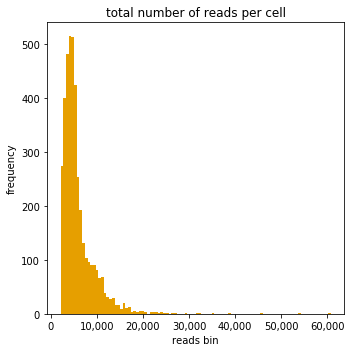

In [5]:
ad.plotting.overall(exp)

***
From the above histogram we can see that a few cells have excessive read counts. Let's count the the numbers of cells with at least 20,000 reads per cell:

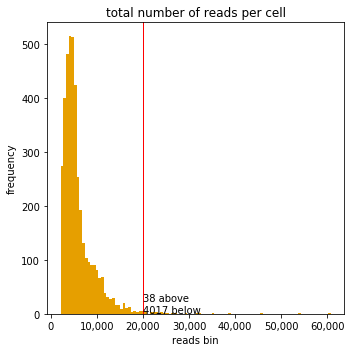

In [11]:
ad.plotting.overall(exp, cut_off=20000)

***
We can see that 38 cells are above the cut off, and we can decide to remove them later. But let's first explore how many genes are expressed per cell:

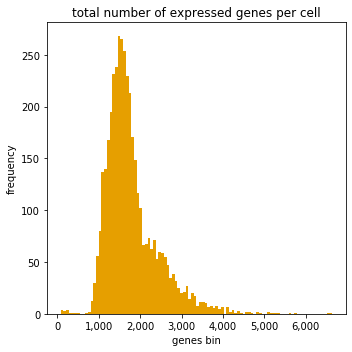

In [14]:
ad.plotting.overall(exp, what='genes')

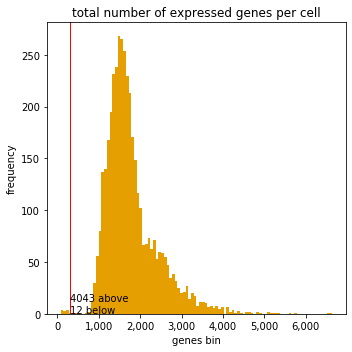

In [26]:
ad.plotting.overall(exp, what='genes', cut_off=300)

We can also relate the total read depth with the number of expressed genes in a scatter plot.

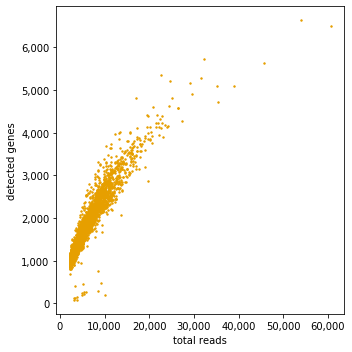

In [16]:
ad.plotting.overall_scatter(exp)

### Apply quality filters

The below command will filter the data to contain only cells with at least 1000 reads and not more than 20,000 reads. In addition, genes expressed in fewer than 100 cells are removed.

In [5]:
ad.preproc.simple_filter(exp,
                         minreads=1000,
                         maxreads=20000,
                         mingenes=0.01,
                         verbose=True)

38 cells and 10816 genes were removed


(38, 10816)

In [6]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:
simple_filter

Normalizations available:

norm_data structure:


***
We can rerun `simple_filter` at any time to adjust the thresholds. Typing the name of the object, `exp`, gives information about the dimensions of the filtered data (9,246 genes and 4017 cells).

### Normalization

adobo supports several normalization procedures. We will here apply a standard normalization, which is a good option for many studies.

In [7]:
ad.normalize.norm(exp, method='standard')

Running the above command will not generate any output as default. The normalized data is present inside the `exp.norm_data` nested dictionary. By typing exp we can see the structure of it:

In [8]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:
simple_filter
norm (standard)

Normalizations available:
standard

norm_data structure:
standard
	data
	method
	log
	norm_ercc
	dr
	clusters
	slingshot
	de

***
If we want to examine the normalized data structure, we can easily accomplish it by accessing:

In [9]:
exp.norm_data['standard']['data']

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm1992,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm37381,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Rp1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Rp1.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.000000,1.386085,0.0,0.000000,0.000000,0.000000,0.000000
PISD,2.214229,1.230027,0.0,1.540766,0.0,1.488532,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.65454,3.664221,2.546228,0.0,1.442189,1.603471,1.396225,1.799408
DHRSX,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,2.209298,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Discover variable genes

Most downstream visualization algorithms like clustering perform better when applied on a subset of genes. The below command will identify 1000 variable genes using the method introduced in the Seurat R package:

In [10]:
ad.hvg.find_hvg(exp, method='seurat', ngenes=1000)

The identified genes can be extracted. To print the first ten:

In [11]:
exp.norm_data['standard']['hvg']['genes'][0:10]

array(['Hba-a2', 'Mcpt4', 'Hba-a1', 'Cpa3', 'Gzma', 'Cd209f', 'Tpsb2',
       'Il22', 'Speer4e', 'Gzmb'], dtype=object)

### Principal component analysis

Generate 50 PCA components from the data

In [12]:
ad.dr.pca(exp, ncomp=50, verbose=True)

Running PCA (method=irlb) on the standard normalization (dimensions 1000 genes x 4017 cells)
saving 50 components


***
As you see from the above output, PCA was run on the highly variable gene-subset of the data (1000 genes). But is 50 principal components too many or too few? One way to find out is to perform a jackstraw analysis, similar to Seurat's function for this, it can be done in adobo as well. `jackstraw` permutates a subset of the data and tests for the enrichment of significant genes in each principal component.

In [13]:
ad.dr.jackstraw(exp, retx=False)

The above command will run for a couple of minutes. After it has finished we can examine the results from the jackstraw analysis to see how many components we should include:

In [15]:
exp.norm_data['standard']['dr']['jackstraw']['results_by_comp']

,PC,chi2_p,chi2_p_adj,significant
0,PC0,1.010873e-56,1.263592e-55,True
1,PC1,1.319308e-94,6.596542e-93,True
2,PC2,2.480639e-39,2.067199e-38,True
3,PC3,2.664415e-38,1.903153e-37,True
4,PC4,4.702074e-52,4.702074e-51,True
5,PC5,1.630398e-69,4.075996e-68,True
6,PC6,6.788508e-63,1.131418e-61,True
7,PC7,3.192988e-28,1.773882e-27,True
8,PC8,4.843929e-08,1.614643e-07,True
9,PC9,6.340812e-21,2.882187e-20,True


From the above table we can see that after component 26, fewer and fewer components become significant. So let's stay use PCs 1-26 in our analyses:

In [16]:
ad.dr.pca(exp, ncomp=26, verbose=True)

Running PCA (method=irlb) on the standard normalization (dimensions 1000 genes x 4017 cells)
saving 26 components


In [17]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:
simple_filter
norm (standard)
find_hvg (seurat)
pca (irlb)

Normalizations available:
standard

norm_data structure:
standard
	data
	method
	log
	norm_ercc
	dr
		pca
			comp
			contr
			method
	clusters
	slingshot
	de
	hvg
		genes
		method

### Generate cell clusters

One of the key goals in single cell analysis is to reduce a large number of cells to a smaller number of cell clusters, to make analysis easier and interpretable. adobo supports a number of different clustering algorithms. Here we will use the Leiden algorithm, which typically yields good results:

In [18]:
ad.clustering.generate(exp, clust_alg='leiden', verbose=True)

Running clustering on the standard normalization
51.48% (n=140,646) of links pruned
cluster cells
0 638
1 599
2 565
3 414
4 317
5 226
6 171
7 129
8 108
9 105
10 97
11 95
12 90
13 78
14 70
15 63
16 60
17 37
18 35
19 26
20 25
21 24
22 23
23 20
24 1
25 1


By default, adobo prints the sizes of the identified cell clusters. This behavior can be suppressed by instead setting `verbose=False`.